# Spatially-enabled Dataframe Plotting Issue


In [1]:
from arcgis.gis import GIS
from arcgis.features import GeoAccessor, GeoSeriesAccessor
import pandas as pd

In [2]:
gis = GIS()

In [3]:
airnow_df = pd.read_csv("..//datasets//airnow_testdata.csv")
airnow_df.head()

,Unnamed: 0,AQSID,SiteName,Status,EPARegion,Latitude,Longitude,Elevation,GMTOffset,CountryCode,...,OZONE_Unit,NO2,NO2_Unit,CO,CO_Unit,SO2,SO2_Unit,PM10,PM10_Unit,SHAPE
0,0,483951076,Franklin Oak Grove,Active,R6,31.168889,-96.481944,136.9,0.0,US,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'x': -96.481944, 'y': 31.168889, 'spatialRefe..."
1,1,080699991,Rocky Mtn NP Collocated,Active,R3,40.277800,-105.545300,2744.7,0.0,US,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'x': -105.5453, 'y': 40.2778, 'spatialReferen..."
2,2,530639995,Colbert-Greenbluff,Active,R10,47.808226,-117.343270,577.4,-8.0,US,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'x': -117.34326999999999, 'y': 47.808226, 'sp..."
3,3,530639997,Spokane-E Broadway Ave (US),Active,R10,47.663963,-117.257652,611.2,-8.0,US,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'x': -117.25765200000001, 'y': 47.663963, 'sp..."
4,4,530639996,Liberty Lake-E Valeyway (US),Inactive,R10,47.660568,-117.084503,650.3,-8.0,US,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'x': -117.084503, 'y': 47.660568, 'spatialRef..."


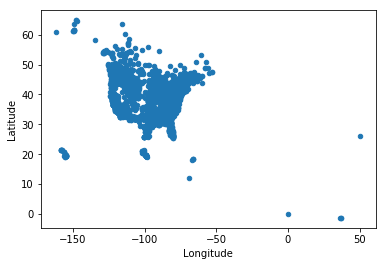

In [6]:
airnow_df.plot(x="Longitude", y="Latitude", kind="scatter")

In [7]:
airnow_sdf = pd.DataFrame.spatial.from_xy(df=airnow_df, x_column="Longitude", y_column="Latitude", sr=4326)
airnow_sdf.head()

,Unnamed: 0,AQSID,SiteName,Status,EPARegion,Latitude,Longitude,Elevation,GMTOffset,CountryCode,...,OZONE_Unit,NO2,NO2_Unit,CO,CO_Unit,SO2,SO2_Unit,PM10,PM10_Unit,SHAPE
0,0,483951076,Franklin Oak Grove,Active,R6,31.168889,-96.481944,136.9,0.0,US,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""x"": -96.481944, ""y"": 31.168889, ""spatialRefe..."
1,1,080699991,Rocky Mtn NP Collocated,Active,R3,40.277800,-105.545300,2744.7,0.0,US,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""x"": -105.5453, ""y"": 40.2778, ""spatialReferen..."
2,2,530639995,Colbert-Greenbluff,Active,R10,47.808226,-117.343270,577.4,-8.0,US,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""x"": -117.34327, ""y"": 47.808226, ""spatialRefe..."
3,3,530639997,Spokane-E Broadway Ave (US),Active,R10,47.663963,-117.257652,611.2,-8.0,US,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""x"": -117.257652, ""y"": 47.663963, ""spatialRef..."
4,4,530639996,Liberty Lake-E Valeyway (US),Inactive,R10,47.660568,-117.084503,650.3,-8.0,US,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""x"": -117.084503, ""y"": 47.660568, ""spatialRef..."


In [8]:
airnow_sdf.shape

(2810, 36)

In [9]:
airnow_sdf['SHAPE']

0       {"x": -96.481944, "y": 31.168889, "spatialRefe...
1       {"x": -105.5453, "y": 40.2778, "spatialReferen...
2       {"x": -117.34327, "y": 47.808226, "spatialRefe...
3       {"x": -117.257652, "y": 47.663963, "spatialRef...
4       {"x": -117.084503, "y": 47.660568, "spatialRef...
5       {"x": -81.276833, "y": 29.489082, "spatialRefe...
6       {"x": -76.746814, "y": 39.371679, "spatialRefe...
7       {"x": -74.156898, "y": 40.631699, "spatialRefe...
8       {"x": -119.218483, "y": 38.257656, "spatialRef...
9       {"x": -74.1994, "y": 40.5802, "spatialReferenc...
10      {"x": -84.538375, "y": 39.146025, "spatialRefe...
11      {"x": -119.073644, "y": 37.784396, "spatialRef...
12      {"x": -106.306107, "y": 40.882198, "spatialRef...
13      {"x": -117.277496, "y": 48.3456, "spatialRefer...
14      {"x": -84.50404, "y": 39.12886, "spatialRefere...
15      {"x": -80.658908, "y": 41.096158, "spatialRefe...
16      {"x": -80.658467, "y": 41.095938, "spatialRefe...
17      {"x": 

In [10]:
usa_map = gis.map("usa")
usa_map

MapView(layout=Layout(height='400px', width='100%'))

In [11]:
airnow_sdf.spatial.plot(usa_map)

True

In [12]:
gis = GIS("https://esrifederal.maps.arcgis.com", username="Anieto_esrifederal")

Enter password: ········


In [13]:
usa_map = gis.map("usa")
usa_map

MapView(layout=Layout(height='400px', width='100%'))

In [15]:
airnow_sdf.spatial.plot(usa_map)

True

### Troubleshooting notes

If the GIS is the default (ArcGIS Online), the spatially-enabled dataframe does not plot on the map widget at all. 

If the GIS is an authenticated portal, the spatially-enabled dataframe partially plots, but the records with nans on numeric fields fail to display.